In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df1 = pd.read_csv('AD-Tech.csv')
df = df1.sample(n=50000,random_state=10).reset_index(drop=True)


In [2]:
df.columns

Index(['date', 'site_id', 'ad_type_id', 'geo_id', 'device_category_id',
       'advertiser_id', 'order_id', 'line_item_type_id', 'os_id',
       'integration_type_id', 'monetization_channel_id', 'ad_unit_id',
       'total_impressions', 'total_revenue', 'viewable_impressions',
       'measurable_impressions', 'revenue_share_percent'],
      dtype='object')

In [2]:
cat_col=['date','geo_id','order_id','site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']

scat_col = ['site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']

for i in cat_col:
    df[i]=df[i].astype('object')

In [3]:
df.drop(['ad_unit_id','revenue_share_percent','integration_type_id'],axis=1,inplace=True)
df.drop(['ad_type_id','site_id','advertiser_id'],axis=1,inplace=True)
df.drop(['date','geo_id','order_id'],axis=1,inplace=True)

In [4]:
df.select_dtypes(object)

,device_category_id,line_item_type_id,os_id,monetization_channel_id
0,2,4,58,19
1,1,8,56,19
2,3,19,59,4
3,2,8,60,19
4,1,20,56,19
...,...,...,...,...
49995,2,8,60,19
49996,2,4,60,19
49997,1,8,56,19
49998,2,4,58,19


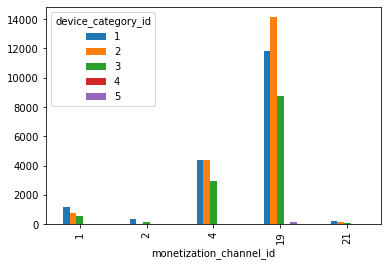

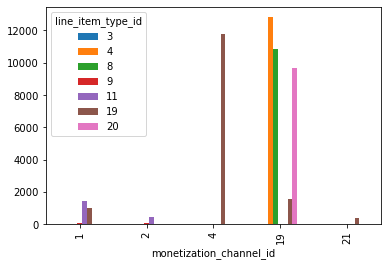

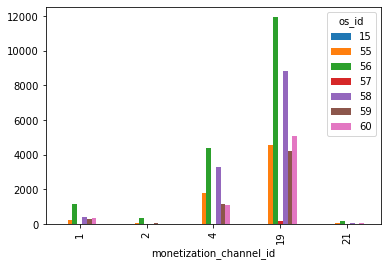

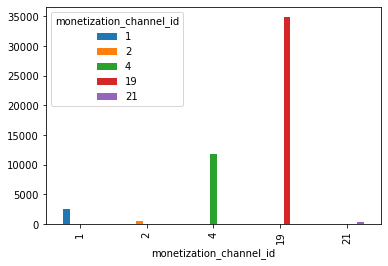

In [5]:
for i in df.select_dtypes(object).columns:
    pd.crosstab(df['monetization_channel_id'],df[i]).plot(kind='bar')
    plt.show()

In [6]:
df

,device_category_id,line_item_type_id,os_id,monetization_channel_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions
0,2,4,58,19,0,0.0000,0,0
1,1,8,56,19,2,0.0000,0,2
2,3,19,59,4,6,0.0064,2,6
3,2,8,60,19,6,0.0000,0,6
4,1,20,56,19,0,0.0000,0,0
...,...,...,...,...,...,...,...,...
49995,2,8,60,19,0,0.0000,0,0
49996,2,4,60,19,0,0.0000,0,0
49997,1,8,56,19,12,0.0000,8,8
49998,2,4,58,19,0,0.0000,0,0


In [7]:
Xd = df.drop('total_revenue',axis=1)
y = df['total_revenue']

In [8]:
X=pd.get_dummies(Xd,drop_first=True)

In [9]:
pc_col=['total_impressions', 'viewable_impressions', 'measurable_impressions']

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [11]:
X[pc_col]=pd.DataFrame(ss.fit_transform(X[pc_col]),columns=[pc_col])

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [13]:
from sklearn.decomposition import PCA
pc_col=['total_impressions', 'viewable_impressions', 'measurable_impressions']
pca = PCA()
pca.fit(X[pc_col])

PCA()

In [14]:
np.cumsum(pca.explained_variance_ratio_)

array([0.95351914, 0.99851015, 1.        ])

In [17]:
pca = PCA(n_components=1)
cc = pca.fit_transform(X_train[pc_col])
cd = pca.transform(X_test[pc_col])

In [18]:
X_train['PC']=cc
X_test['PC']=cd

In [19]:
X_train.drop(pc_col,axis=1,inplace=True)
X_test.drop(pc_col,axis=1,inplace=True)

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [22]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error

In [23]:
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)

print('Train')
print('R2 Score:',r2_score(y_train,y_train_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_train,y_train_pred))

y_test_pred=lr.predict(X_test)

print('\n\nTest')
print('R2 Score:',r2_score(y_test,y_test_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test,y_test_pred))

Train
R2 Score: 0.6661111519764441
Root Mean Squared Error: 0.3820520325938847
Mean Absolute Percentage Error: 89320808780299.86


Test
R2 Score: 0.6925620011071734
Root Mean Squared Error: 0.34540859563072146
Mean Absolute Percentage Error: 76242881613089.38


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor()

rfr.fit(X_train,y_train)
y_train_pred=rfr.predict(X_train)

print('r2 Train',r2_score(y_train,y_train_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

y_test_pred=rfr.predict(X_test)

print('\n\nTest')
print('\nr2 Test',r2_score(y_test,y_test_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [ ]:
rfrbest1 = {'max_depth': 12,
 'max_features': 8,
 'min_samples_leaf': 3,
 'n_estimators': 160}

In [ ]:
rfr = RandomForestRegressor(**rfrbest1)

rfr.fit(X_train,y_train)
y_train_pred=rfr.predict(X_train)

print('r2 Train',r2_score(y_train,y_train_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

y_test_pred=rfr.predict(X_test)

print('\n\nTest')
print('\nr2 Test',r2_score(y_test,y_test_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

In [ ]:
rfrbest2 = {'max_depth': 12,
 'max_features': 15,
 'min_samples_leaf': 6,
 'n_estimators': 154}

In [ ]:
rfr = RandomForestRegressor(**rfrbest2)

rfr.fit(X_train,y_train)
y_train_pred=rfr.predict(X_train)

print('r2 Train',r2_score(y_train,y_train_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

y_test_pred=rfr.predict(X_test)

print('\n\nTest')
print('\nr2 Test',r2_score(y_test,y_test_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_test,y_test_pred)))